In [63]:
#  Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [64]:
# Load dataset
dataset = pd.read_csv(r"C:\Users\Dell\Downloads\emp_sal.csv")
dataset

,Position,Level,Salary
0,Jr Software Engineer,1,45000
1,Sr Software Engineer,2,50000
2,Team Lead,3,60000
3,Manager,4,80000
4,Sr manager,5,110000
5,Region Manager,6,150000
6,AVP,7,200000
7,VP,8,300000
8,CTO,9,500000
9,CEO,10,1000000


In [65]:
# Independent & dependent variable
x = dataset.iloc[:,1:2].values #Experience
y = dataset.iloc[:,2].values #Salary

In [66]:
# Train-Test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 0)

In [67]:
# Feature Scaling (Mandantory for SVR)
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_y = StandardScaler()

In [68]:
x_train_scaled = sc_x.fit_transform(x_train)
x_test_scaled = sc_x.transform(x_test)

In [69]:
y_train_scaled = sc_y.fit_transform(y_train.reshape(-1,1)).ravel()

In [70]:
# SVR Model
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf', C = 100, gamma = 0.1, epsilon = 0.1)
regressor.fit(x_train_scaled,y_train_scaled)

SVR(C=100, gamma=0.1)

In [71]:
# Prediction
y_pred_test_scaled = regressor.predict(x_test_scaled)
y_pred_test = sc_y.inverse_transform(
    y_pred_test_scaled.reshape(-1,1)
)

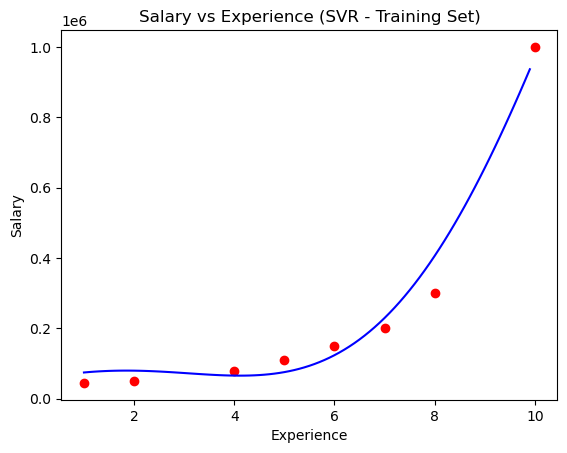

In [72]:
# Visualize Training set
x_grid = np.arange( x_train.min(), x_train.max(), 0.1).reshape(-1, 1)

plt.scatter(x_train, y_train, color='red')  # Real data
plt.plot( x_grid, sc_y.inverse_transform( regressor.predict(sc_x.transform(x_grid)).reshape(-1,1) ), color='blue')
plt.title('Salary vs Experience (SVR - Training Set)')
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.show()

In [73]:
x_65_scaled = sc_x.transform([[6.5]])

In [74]:
y_65_scaled = regressor.predict(x_65_scaled)

In [75]:
y_65 = sc_y.inverse_transform(y_65_scaled.reshape(-1,1))

In [76]:
print("Predicted Salary:", y_65)

Predicted Salary: [[168479.6538226]]
